Logistic Regression

In [1]:
import math
import random
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support as sk_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.cross_validation import train_test_split
from numpy import loadtxt, where
from pylab import scatter, show, legend, xlabel, ylabel
import seaborn as sns

##implementation of sigmoid function
def Sigmoid(x):
	g = float(1.0 / float((1.0 + math.exp(-1.0*x))))
	return g

##Prediction function
def Prediction(theta, x):
	z = 0
	for i in range(len(theta)):
		z += x[i]*theta[i]
	return Sigmoid(z)


# implementation of cost functions
def Cost_Function(X,Y,theta,m):
	sumOfErrors = 0
	for i in range(m):
		xi = X[i]
		est_yi = Prediction(theta,xi)
		if Y[i] == 1:
			error = Y[i] * math.log(est_yi)
		elif Y[i] == 0:
			error = (1-Y[i]) * math.log(1-est_yi)
		sumOfErrors += error
	const = -1/m
	J = const * sumOfErrors
	#print 'cost is ', J 
	return J

 
# gradient components called by Gradient_Descent()
def Cost_Function_Derivative(X,Y,theta,j,m,alpha):
	sumErrors = 0
	for i in range(m):
		xi = X[i]
		xij = xi[j]
		hi = Prediction(theta,X[i])
		error = (hi - Y[i])*xij
		sumErrors += error
	m = len(Y)
	constant = float(alpha)/float(m)
	J = constant * sumErrors
	return J

# execute gradient updates over thetas
def Gradient_Descent(X,Y,theta,m,alpha):
	new_theta = []
	constant = alpha/m
	for j in range(len(theta)):
		deltaF = Cost_Function_Derivative(X,Y,theta,j,m,alpha)
		new_theta_value = theta[j] - deltaF
		new_theta.append(new_theta_value)
	return new_theta



/Users/tylerkistler/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#My custom confusion matrix function, returning accuracy, precision, recall

def func_calConfusionMatrix(predY, trueY):
    score = 0
    length = len(predY)
    for i in range(length):
        #prediction = round(Prediction(testX[i],theta))
        prediction = predY[i]
        answer = trueY[i]
        if prediction == answer:
            score += 1
    my_score = float(score) / float(length)
    precision = average_precision_score(trueY, predY)
    print('average precision-recall score: {}'.format(precision))
    print('accuracy: ' + str(my_score))
    
    conf_mat = confusion_matrix(trueY, predY)
    fig, ax = plt.subplots(figsize = (10,8))
    sns.heatmap(conf_mat, 
                annot = True, 
                fmt = 'd')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [3]:
#import numpy as np
#import math
#import random

# this script is used to generate a set of random data points for classification problems. 


def getDataSet():
    """
    Returns X (250 X 2) and Y (250 X 1)
    """
    # Step 1: Generate data by a module
    n = 100  # 1st class contains N objects
    alpha = 1.5  # 2st class contains alpha*N ones
    sig2 = 1  # assume 2nd class has the same variance as the 1st
    dist2 = 4

    # later we move this piece of code in a separate file
    # [X, y] = loadModelData(N, alpha, sig2, dist2);
    n2 = math.floor(alpha * n)  # calculate the size of the 2nd class
    cls1X = np.random.randn(n, 2)  # generate random objects of the 1st class

    # generate a random distance from the center of the 1st class to the center of the 2nd
    # https://stackoverflow.com/questions/1721802/what-is-the-equivalent-of-matlabs-repmat-in-numpy
    a = np.array([[math.sin(math.pi * random.random()), math.cos(math.pi * random.random())]])
    a1 = a * dist2
    shiftClass2 = np.kron(np.ones((n2, 1)), a1)

    # generate random objects of the 2nd class
    cls2X = sig2 * np.random.randn(n2, 2) + shiftClass2
    # combine the objects
    X = np.concatenate((cls1X, cls2X), axis=0)

    # assign class labels: 0s and 1s
    y = np.concatenate((np.zeros((cls1X.shape[0], 1)), np.ones((cls2X.shape[0], 1))), axis=0)
    # end % of module.
    return X, y


In [4]:

# Starting codes

# step 1: generate dataset that includes both positive and negative samples,
# where each sample is described with two features.
# 250 samples in total.

[X, y] = getDataSet()  # note that y contains only 1s and 0s,

# create figure for all charts to be placed on so can be viewed together
fig = plt.figure()


def func_DisplayData(dataSamplesX, dataSamplesY, chartNum, titleMessage):
    idx1 = (dataSamplesY == 0).nonzero()  # object indices for the 1st class
    idx2 = (dataSamplesY == 1).nonzero()
    ax = fig.add_subplot(1, 3, chartNum)
    # no more variables are needed
    plt.plot(dataSamplesX[idx1, 0], dataSamplesX[idx1, 1], 'r*')
    plt.plot(dataSamplesX[idx2, 0], dataSamplesX[idx2, 1], 'b*')
    # axis tight
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_title(titleMessage)


# plotting all samples
func_DisplayData(X, y, 1, 'All samples')

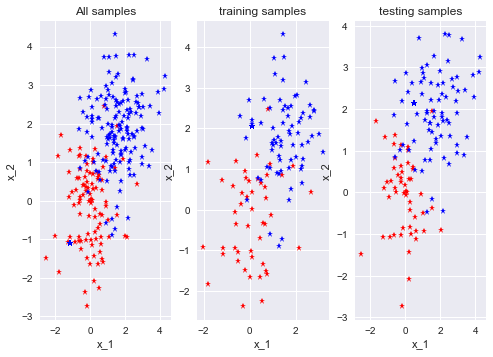

In [5]:
# number of training samples
nTrain = 120

# write you own code to randomly pick up nTrain number of samples for training and use the rest for testing. 
trainX, testX, trainY, testY = train_test_split(X, y,
                                                stratify=y, 
                                                test_size=((len(X)-nTrain)/len(X)))

# plot the samples you have pickup for training, check to confirm that both negative
# and positive samples are included.
func_DisplayData(trainX, trainY, 2, 'training samples')
func_DisplayData(testX, testY, 3, 'testing samples')

# show all charts
plt.show()


average precision-recall score: 1.0
accuracy: 1.0


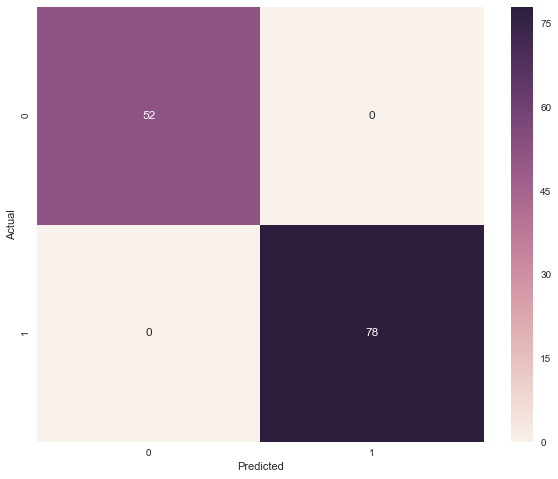

In [6]:
func_calConfusionMatrix(testY, testY)

In [7]:
#  step 2: train logistic regression models

# in this placefolder you will need to train a logistic model using the training data: trainX, and trainY.

theta = [0,0] #initial model parameters
alpha = 0.1 # learning rates
max_iteration = 1000 # maximal iterations
bias = []
coeffs = []

m = len(trainY) # number of samples

for x in range(max_iteration):
	# call the functions for gradient descent method
	new_theta = Gradient_Descent(trainX,trainY,theta,m,alpha)
	theta = new_theta
	bias.append(Cost_Function(trainX,trainY,theta,m))
	coeffs.append(theta)
	if x % 200 == 0:
		# calculate the cost function with the present theta
		Cost_Function(trainX,trainY,theta,m)
		print('theta ', theta)
		print('cost is ', Cost_Function(trainX,trainY,theta,m))


theta  [array([ 0.04269927]), array([ 0.05781589])]
cost is  [ 0.64423715]
theta  [array([ 0.62358165]), array([ 0.92842348])]
cost is  [ 0.39057554]
theta  [array([ 0.6211547]), array([ 0.93589525])]
cost is  [ 0.3905704]
theta  [array([ 0.62050807]), array([ 0.93642479])]
cost is  [ 0.39057035]
theta  [array([ 0.62042005]), array([ 0.93648984])]
cost is  [ 0.39057035]


# use sklearn class
clf = LogisticRegression(fit_intercept=True, penalty='l2', class_weight='balanced', C=1e15)
# call the function fit() to train the class instance
clf.fit(trainX,trainY)

coeffs = clf.coef_ # coefficients
intercept = clf.intercept_ # bias 
bHat = np.hstack((np.array([intercept]), coeffs))

# scores over testing samples
print('score Scikit learn: ', clf.score(testX,testY))

# visualize data using functions in the library pylab 
pos = where(y == 1)
neg = where(y == 0)
scatter(X[pos, 0], X[pos, 1], marker='o', c='b')
scatter(X[neg, 0], X[neg, 1], marker='x', c='r')
xlabel('Feature 1: score 1')
ylabel('Feature 2: score 2')
legend(['Label:  YES', 'Label: NO'])
show()

average precision-recall score: 0.7428571428571429
accuracy: 0.7923076923076923


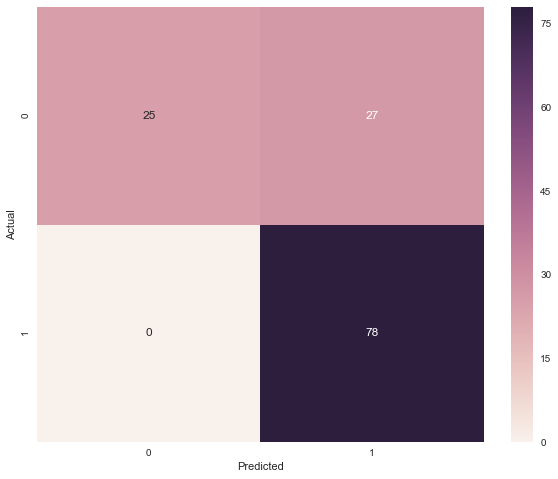

In [8]:
# step 3: Use the model to get class labels of testing samples.
 

# codes for making prediction, 
# with the learned model, apply the logistic model over testing samples
# hatProb is the probability of belonging to the class 1.
#y = 1/(1+exp(-Xb))
#yHat = (1./(1+np.exp(np.negative(np.concatenate((np.ones((testX.shape[0], 1)), testX), axis=1)
                                 #* bHat.T ))) >= 0.5).astype(int)
m,n=np.shape(testX)
y=testY.reshape(m,1)

#xHat=np.c_[np.ones((m,1)),testX] #adds column of 1s to left
#coeffs = np.zeros((n+1,1))
#bHat = np.dot(bias, coeffs.T)
#negXHat = np.negative(xHat) #negative multiplication to matrix
#hatProb = 1.0 / (1.0 + np.exp(np.dot(negXHat, bHat.T))) #variant of classification
#yHat = (hatProb >= 0.5).astype(int) #convert bool to binary
#class labels predicted with threshold

predY = []
length = len(testX)
for i in range(length):
        prediction = round(Prediction(testX[i],theta))
        predY.append(prediction)

func_calConfusionMatrix(predY, y)

######################PLACEHOLDER 3 #end #########################


In [9]:
# step 4: evaluation
# compare predictions yHat and and true labels testy to calculate average error and standard deviation
testYDiff = np.abs(predY - y)
avgErr = np.mean(testYDiff)
stdErr = np.std(testYDiff)

print('average error: {} ({})'.format(avgErr, stdErr))


average error: 0.43846153846153846 (0.49619856685754277)


REPORT:

For problem 2, the number of correct predictions is 7. To compute the accuracy of this confusion matrix, we simply divide 7 by the length of the test, which is 20. Thus, the accuracy for Problem 2 is 0.35.

I usually use sklearn for most of my personal experience in prediction modeling, but it was interesting to break apart and manually implement alternative routes to predict and analyze. Since this is binary classification, the error can only start so low without training (since you almost have a 50/50 shot to classify correct without prior knowledge), making the learning progression less evident than a multiclass labeling. Increasing the sample sizes would increase the accuracy in predicting and also minimize the average error. 

When dealing with binary classifications, I much prefer the use of Naive Bayes models, over Logistical Regression models or Linear SVC models. I find the latter two models to be more superior in learning and predicting multiclass scenarios. 

Looking at the sample data, it appears that perfect accuracy isn't achievable, most likely do to overlapping features and situational exceptions. In a linear regression model, a best fit line is evaluated, but even the best fit line will still have inaccuracies (unless the line morphs and bends around individual nodes, but it doesn't...)